# **Imports**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

# **Preparing the data**

**Reading the data**

In [ ]:
data = pd.read_csv('BTC-USDT.csv')

In [ ]:
import re
data['Price'] = data['Price'].apply(lambda x: x.replace(",", ""))

In [ ]:
data

,Date,Price
0,6-Dec-21,49052.40
1,5-Dec-21,49405.50
2,4-Dec-21,49195.20
3,3-Dec-21,53631.50
4,2-Dec-21,56496.00
...,...,...
361,10-Dec-20,18247.20
362,9-Dec-20,18546.00
363,8-Dec-20,18326.60
364,7-Dec-20,19170.70


In [ ]:
data['Price'] = data['Price'].astype('float')

In [ ]:
data.dtypes

Date      object
Price    float64
dtype: object

In [ ]:
data

,Date,Price
0,6-Dec-21,49052.4
1,5-Dec-21,49405.5
2,4-Dec-21,49195.2
3,3-Dec-21,53631.5
4,2-Dec-21,56496.0
...,...,...
361,10-Dec-20,18247.2
362,9-Dec-20,18546.0
363,8-Dec-20,18326.6
364,7-Dec-20,19170.7


Extracting day/month/year from ***Date*** column

In [ ]:
data['day'] = data['Date'].apply(lambda x: x.split('-')[0])
data['month'] = data['Date'].apply(lambda x: x.split('-')[1])
data['year'] = data['Date'].apply(lambda x: x.split('-')[2])

data['month'] = 11  - pd.factorize(data['month'])[0] + 1
data['year'] = data['year'].astype('int')
data['day'] = data['day'].astype('int')

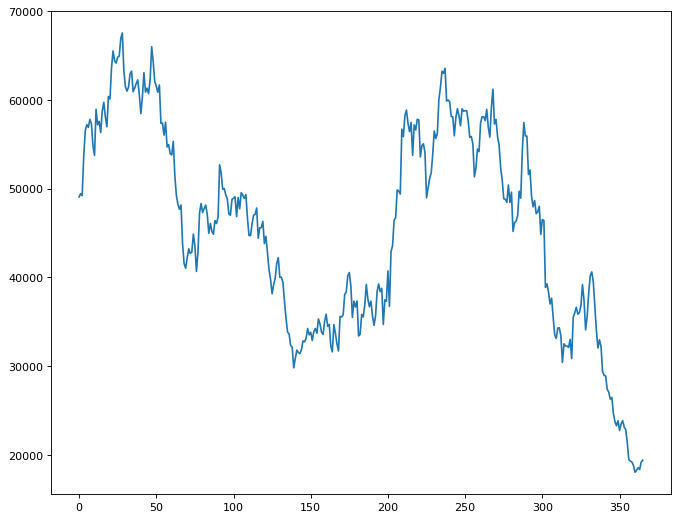

In [ ]:
from matplotlib.pyplot import figure

figure(figsize=(10, 8), dpi=80)

plt.plot(data['Price'])
plt.show()

In [ ]:
data['day_n'] = [366 - i for i in range(1, len(data) + 1)]

In [ ]:
data

,Date,Price,day,month,year,day_n
0,6-Dec-21,49052.4,6,12,21,365
1,5-Dec-21,49405.5,5,12,21,364
2,4-Dec-21,49195.2,4,12,21,363
3,3-Dec-21,53631.5,3,12,21,362
4,2-Dec-21,56496.0,2,12,21,361
...,...,...,...,...,...,...
361,10-Dec-20,18247.2,10,12,20,4
362,9-Dec-20,18546.0,9,12,20,3
363,8-Dec-20,18326.6,8,12,20,2
364,7-Dec-20,19170.7,7,12,20,1


**Creating the test data**

In [ ]:
day_n = [366 + i for i in range(20)]

year = [20 for i in range(6)]
year.extend([21 for i in range(14)])

month = [12 for i in range(6)]
month.extend([1 for i in range(14)])

day = [i for i in range(6)]
day.extend([30 - i for i in range(14)])

d = {'day_n':day_n, 'year':year, 'month':month, 'day':day}

to_be_predicted = pd.DataFrame(d)  

In [ ]:
to_be_predicted

,day_n,year,month,day
0,366,20,12,0
1,367,20,12,1
2,368,20,12,2
3,369,20,12,3
4,370,20,12,4
5,371,20,12,5
6,372,21,1,30
7,373,21,1,29
8,374,21,1,28
9,375,21,1,27


In [ ]:
y = data['Price']

In [ ]:
y

0      49052.4
1      49405.5
2      49195.2
3      53631.5
4      56496.0
        ...   
361    18247.2
362    18546.0
363    18326.6
364    19170.7
365    19379.9
Name: Price, Length: 366, dtype: float64

In [ ]:
data = pd.concat([data, to_be_predicted])

In [ ]:
an = list(data.columns)
an.remove('Date')

**Normalizing the data**

Here, I've converted the range of columns' values to 0-1.

In [ ]:
max_v = np.amax(np.array(data[an].values), axis=0)
min_v = np.amin(np.array(data[an].values), axis=0)
mean_v = np.mean(np.array(data[an].values), axis=0)

def normalize(X):
  return (X - np.amin(X, axis=0)) / (np.amax(X, axis=0) - np.amin(X, axis=0))

data[an] = normalize(np.array(data[an].values))

In [ ]:
data

,Date,Price,day,month,year,day_n
0,6-Dec-21,NaN,0.193548,1.0,1.0,0.948052
1,5-Dec-21,NaN,0.161290,1.0,1.0,0.945455
2,4-Dec-21,NaN,0.129032,1.0,1.0,0.942857
3,3-Dec-21,NaN,0.096774,1.0,1.0,0.940260
4,2-Dec-21,NaN,0.064516,1.0,1.0,0.937662
...,...,...,...,...,...,...
15,NaN,NaN,0.677419,0.0,1.0,0.989610
16,NaN,NaN,0.645161,0.0,1.0,0.992208
17,NaN,NaN,0.612903,0.0,1.0,0.994805
18,NaN,NaN,0.580645,0.0,1.0,0.997403


In [ ]:
data = data[an]
data

,Price,day,month,year,day_n
0,NaN,0.193548,1.0,1.0,0.948052
1,NaN,0.161290,1.0,1.0,0.945455
2,NaN,0.129032,1.0,1.0,0.942857
3,NaN,0.096774,1.0,1.0,0.940260
4,NaN,0.064516,1.0,1.0,0.937662
...,...,...,...,...,...
15,NaN,0.677419,0.0,1.0,0.989610
16,NaN,0.645161,0.0,1.0,0.992208
17,NaN,0.612903,0.0,1.0,0.994805
18,NaN,0.580645,0.0,1.0,0.997403


**Adding some larger degrees of columns' values.**

In [ ]:
data['day1']  = data['day'] ** 2
data['month1']  = data['month'] ** 2
data['year1']  = data['year'] ** 2
data['day_n1']  = data['day_n'] ** 2

data['day2']  = data['day'] ** 3
data['month2']  = data['month'] ** 3
data['year2']  = data['year'] ** 3
data['day_n2']  = data['day_n'] ** 3

data['day3']  = data['day'] ** 4
data['month3']  = data['month'] ** 4
data['year3']  = data['year'] ** 4
data['day_n3']  = data['day_n'] ** 4

data['day4']  = data['day'] ** 5
data['month4']  = data['month'] ** 5
data['year4']  = data['year'] ** 5
data['day_n4']  = data['day_n'] ** 5

data['day5']  = data['day'] ** 6
data['month5']  = data['month'] ** 6
data['year5']  = data['year'] ** 6
data['day_n5']  = data['day_n'] ** 6


data['day6']  = data['day'] ** 7
data['month6']  = data['month'] ** 7
data['year6']  = data['year'] ** 7
data['day_n6']  = data['day_n'] ** 7

data['day7']  = data['day'] ** 8
data['month7']  = data['month'] ** 8
data['year7']  = data['year'] ** 8
data['day_n7']  = data['day_n'] ** 8

data['day8']  = data['day'] ** 9
data['month8']  = data['month'] ** 9
data['year8']  = data['year'] ** 9
data['day_n8']  = data['day_n'] ** 9

In [ ]:
data

,Price,day,month,year,day_n,day1,month1,year1,day_n1,day2,month2,year2,day_n2,day3,month3,year3,day_n3,day4,month4,year4,day_n4,day5,month5,year5,day_n5,day6,month6,year6,day_n6,day7,month7,year7,day_n7,day8,month8,year8,day_n8
0,NaN,0.193548,1.0,1.0,0.948052,0.037461,1.0,1.0,0.898802,0.007251,1.0,1.0,0.852111,0.001403,1.0,1.0,0.807846,0.000272,1.0,1.0,0.765880,5.256992e-05,1.0,1.0,0.726094,1.017482e-05,1.0,1.0,0.688375,1.969321e-06,1.0,1.0,0.652615,3.811589e-07,1.0,1.0,0.618713
1,NaN,0.161290,1.0,1.0,0.945455,0.026015,1.0,1.0,0.893884,0.004196,1.0,1.0,0.845127,0.000677,1.0,1.0,0.799029,0.000109,1.0,1.0,0.755446,1.760556e-05,1.0,1.0,0.714240,2.839607e-06,1.0,1.0,0.675281,4.580011e-07,1.0,1.0,0.638448,7.387114e-08,1.0,1.0,0.603623
2,NaN,0.129032,1.0,1.0,0.942857,0.016649,1.0,1.0,0.888980,0.002148,1.0,1.0,0.838181,0.000277,1.0,1.0,0.790285,0.000036,1.0,1.0,0.745126,4.615192e-06,1.0,1.0,0.702547,5.955087e-07,1.0,1.0,0.662401,7.683983e-08,1.0,1.0,0.624550,9.914816e-09,1.0,1.0,0.588861
3,NaN,0.096774,1.0,1.0,0.940260,0.009365,1.0,1.0,0.884088,0.000906,1.0,1.0,0.831273,0.000088,1.0,1.0,0.781612,0.000008,1.0,1.0,0.734919,8.214050e-07,1.0,1.0,0.691014,7.949081e-08,1.0,1.0,0.649733,7.692659e-09,1.0,1.0,0.610918,7.444509e-10,1.0,1.0,0.574421
4,NaN,0.064516,1.0,1.0,0.937662,0.004162,1.0,1.0,0.879211,0.000269,1.0,1.0,0.824403,0.000017,1.0,1.0,0.773011,0.000001,1.0,1.0,0.724824,7.211238e-08,1.0,1.0,0.679640,4.652411e-09,1.0,1.0,0.637273,3.001556e-10,1.0,1.0,0.597547,1.936488e-11,1.0,1.0,0.560297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,NaN,0.677419,0.0,1.0,0.989610,0.458897,0.0,1.0,0.979329,0.310866,0.0,1.0,0.969154,0.210586,0.0,1.0,0.959085,0.142655,0.0,1.0,0.949120,9.663748e-02,0.0,1.0,0.939259,6.546410e-02,0.0,1.0,0.929501,4.434665e-02,0.0,1.0,0.919844,3.004128e-02,0.0,1.0,0.910287
16,NaN,0.645161,0.0,1.0,0.992208,0.416233,0.0,1.0,0.984476,0.268537,0.0,1.0,0.976805,0.173250,0.0,1.0,0.969194,0.111774,0.0,1.0,0.961641,7.211238e-02,0.0,1.0,0.954148,4.652411e-02,0.0,1.0,0.946713,3.001556e-02,0.0,1.0,0.939336,1.936488e-02,0.0,1.0,0.932017
17,NaN,0.612903,0.0,1.0,0.994805,0.375650,0.0,1.0,0.989637,0.230237,0.0,1.0,0.984496,0.141113,0.0,1.0,0.979382,0.086489,0.0,1.0,0.974294,5.300922e-02,0.0,1.0,0.969233,3.248952e-02,0.0,1.0,0.964198,1.991293e-02,0.0,1.0,0.959189,1.220470e-02,0.0,1.0,0.954207
18,NaN,0.580645,0.0,1.0,0.997403,0.337149,0.0,1.0,0.994812,0.195764,0.0,1.0,0.992228,0.113669,0.0,1.0,0.989651,0.066002,0.0,1.0,0.987080,3.832347e-02,0.0,1.0,0.984516,2.225234e-02,0.0,1.0,0.981959,1.292071e-02,0.0,1.0,0.979409,7.502350e-03,0.0,1.0,0.976865


In [ ]:
to_be_predicted = data[-20:]

data = data[:-20]

In [ ]:
to_be_predicted

,Price,day,month,year,day_n,day1,month1,year1,day_n1,day2,month2,year2,day_n2,day3,month3,year3,day_n3,day4,month4,year4,day_n4,day5,month5,year5,day_n5,day6,month6,year6,day_n6,day7,month7,year7,day_n7,day8,month8,year8,day_n8
0,NaN,0.000000,1.0,0.0,0.950649,0.000000,1.0,0.0,0.903734,0.000000,1.0,0.0,0.859134,0.000000,1.0,0.0,0.816735,0.000000e+00,1.0,0.0,0.776429,0.000000e+00,1.0,0.0,0.738112,0.000000e+00,1.0,0.0,0.701685,0.000000e+00,1.0,0.0,0.667057,0.000000e+00,1.0,0.0,0.634137
1,NaN,0.032258,1.0,0.0,0.953247,0.001041,1.0,0.0,0.908679,0.000034,1.0,0.0,0.866196,0.000001,1.0,0.0,0.825698,3.492943e-08,1.0,0.0,0.787094,1.126756e-09,1.0,0.0,0.750295,3.634696e-11,1.0,0.0,0.715216,1.172483e-12,1.0,0.0,0.681778,3.782202e-14,1.0,0.0,0.649902
2,NaN,0.064516,1.0,0.0,0.955844,0.004162,1.0,0.0,0.913638,0.000269,1.0,0.0,0.873296,0.000017,1.0,0.0,0.834734,1.117742e-06,1.0,0.0,0.797876,7.211238e-08,1.0,0.0,0.762645,4.652411e-09,1.0,0.0,0.728970,3.001556e-10,1.0,0.0,0.696782,1.936488e-11,1.0,0.0,0.666015
3,NaN,0.096774,1.0,0.0,0.958442,0.009365,1.0,0.0,0.918610,0.000906,1.0,0.0,0.880434,0.000088,1.0,0.0,0.843845,8.487852e-06,1.0,0.0,0.808776,8.214050e-07,1.0,0.0,0.775164,7.949081e-08,1.0,0.0,0.742950,7.692659e-09,1.0,0.0,0.712074,7.444509e-10,1.0,0.0,0.682481
4,NaN,0.129032,1.0,0.0,0.961039,0.016649,1.0,0.0,0.923596,0.002148,1.0,0.0,0.887612,0.000277,1.0,0.0,0.853029,3.576774e-05,1.0,0.0,0.819794,4.615192e-06,1.0,0.0,0.787854,5.955087e-07,1.0,0.0,0.757159,7.683983e-08,1.0,0.0,0.727659,9.914816e-09,1.0,0.0,0.699309
5,NaN,0.161290,1.0,0.0,0.963636,0.026015,1.0,0.0,0.928595,0.004196,1.0,0.0,0.894828,0.000677,1.0,0.0,0.862289,1.091545e-04,1.0,0.0,0.830933,1.760556e-05,1.0,0.0,0.800717,2.839607e-06,1.0,0.0,0.771600,4.580011e-07,1.0,0.0,0.743542,7.387114e-08,1.0,0.0,0.716504
6,NaN,0.967742,0.0,1.0,0.966234,0.936524,0.0,1.0,0.933608,0.906314,0.0,1.0,0.902083,0.877078,0.0,1.0,0.871623,8.487852e-01,0.0,1.0,0.842192,8.214050e-01,0.0,1.0,0.813754,7.949081e-01,0.0,1.0,0.786277,7.692659e-01,0.0,1.0,0.759727,7.444509e-01,0.0,1.0,0.734074
7,NaN,0.935484,0.0,1.0,0.968831,0.875130,0.0,1.0,0.938634,0.818670,0.0,1.0,0.909378,0.765853,0.0,1.0,0.881033,7.164428e-01,0.0,1.0,0.853573,6.702207e-01,0.0,1.0,0.826968,6.269806e-01,0.0,1.0,0.801192,5.865303e-01,0.0,1.0,0.776220,5.486896e-01,0.0,1.0,0.752026
8,NaN,0.903226,0.0,1.0,0.971429,0.815817,0.0,1.0,0.943673,0.736867,0.0,1.0,0.916711,0.665557,0.0,1.0,0.890520,6.011484e-01,0.0,1.0,0.865076,5.429727e-01,0.0,1.0,0.840360,4.904270e-01,0.0,1.0,0.816349,4.429663e-01,0.0,1.0,0.793025,4.000986e-01,0.0,1.0,0.770367
9,NaN,0.870968,0.0,1.0,0.974026,0.758585,0.0,1.0,0.948727,0.660703,0.0,1.0,0.924084,0.575451,0.0,1.0,0.900082,5.011992e-01,0.0,1.0,0.876703,4.365283e-01,0.0,1.0,0.853932,3.802021e-01,0.0,1.0,0.831752,3.311438e-01,0.0,1.0,0.810148,2.884155e-01,0.0,1.0,0.789105


In [ ]:
data

,Price,day,month,year,day_n,day1,month1,year1,day_n1,day2,month2,year2,day_n2,day3,month3,year3,day_n3,day4,month4,year4,day_n4,day5,month5,year5,day_n5,day6,month6,year6,day_n6,day7,month7,year7,day_n7,day8,month8,year8,day_n8
0,NaN,0.193548,1.0,1.0,0.948052,0.037461,1.0,1.0,0.898802,0.007251,1.0,1.0,8.521115e-01,0.001403,1.0,1.0,8.078459e-01,0.000272,1.0,1.0,7.658799e-01,5.256992e-05,1.0,1.0,7.260939e-01,1.017482e-05,1.0,1.0,6.883748e-01,1.969321e-06,1.0,1.0,6.526150e-01,3.811589e-07,1.0,1.0,6.187130e-01
1,NaN,0.161290,1.0,1.0,0.945455,0.026015,1.0,1.0,0.893884,0.004196,1.0,1.0,8.451270e-01,0.000677,1.0,1.0,7.990291e-01,0.000109,1.0,1.0,7.554457e-01,1.760556e-05,1.0,1.0,7.142396e-01,2.839607e-06,1.0,1.0,6.752811e-01,4.580011e-07,1.0,1.0,6.384476e-01,7.387114e-08,1.0,1.0,6.036231e-01
2,NaN,0.129032,1.0,1.0,0.942857,0.016649,1.0,1.0,0.888980,0.002148,1.0,1.0,8.381808e-01,0.000277,1.0,1.0,7.902847e-01,0.000036,1.0,1.0,7.451256e-01,4.615192e-06,1.0,1.0,7.025470e-01,5.955087e-07,1.0,1.0,6.624014e-01,7.683983e-08,1.0,1.0,6.245499e-01,9.914816e-09,1.0,1.0,5.888614e-01
3,NaN,0.096774,1.0,1.0,0.940260,0.009365,1.0,1.0,0.884088,0.000906,1.0,1.0,8.312727e-01,0.000088,1.0,1.0,7.816123e-01,0.000008,1.0,1.0,7.349185e-01,8.214050e-07,1.0,1.0,6.910143e-01,7.949081e-08,1.0,1.0,6.497329e-01,7.692659e-09,1.0,1.0,6.109177e-01,7.444509e-10,1.0,1.0,5.744213e-01
4,NaN,0.064516,1.0,1.0,0.937662,0.004162,1.0,1.0,0.879211,0.000269,1.0,1.0,8.244027e-01,0.000017,1.0,1.0,7.730114e-01,0.000001,1.0,1.0,7.248237e-01,7.211238e-08,1.0,1.0,6.796398e-01,4.652411e-09,1.0,1.0,6.372727e-01,3.001556e-10,1.0,1.0,5.975466e-01,1.936488e-11,1.0,1.0,5.602969e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,NaN,0.322581,1.0,0.0,0.010390,0.104058,1.0,0.0,0.000108,0.033567,1.0,0.0,1.121496e-06,0.010828,1.0,0.0,1.165191e-08,0.003493,1.0,0.0,1.210588e-10,1.126756e-03,1.0,0.0,1.257754e-12,3.634696e-04,1.0,0.0,1.306757e-14,1.172483e-04,1.0,0.0,1.357670e-16,3.782202e-05,1.0,0.0,1.410566e-18
362,NaN,0.290323,1.0,0.0,0.007792,0.084287,1.0,0.0,0.000061,0.024470,1.0,0.0,4.731312e-07,0.007104,1.0,0.0,3.686737e-09,0.002063,1.0,0.0,2.872782e-11,5.988043e-04,1.0,0.0,2.238531e-13,1.738464e-04,1.0,0.0,1.744310e-15,5.047154e-05,1.0,0.0,1.359203e-17,1.465303e-05,1.0,0.0,1.059119e-19
363,NaN,0.258065,1.0,0.0,0.005195,0.066597,1.0,0.0,0.000027,0.017186,1.0,0.0,1.401870e-07,0.004435,1.0,0.0,7.282443e-10,0.001145,1.0,0.0,3.783087e-12,2.953723e-04,1.0,0.0,1.965240e-14,7.622511e-05,1.0,0.0,1.020904e-16,1.967100e-05,1.0,0.0,5.303397e-19,5.076386e-06,1.0,0.0,2.755011e-21
364,NaN,0.225806,1.0,0.0,0.002597,0.050989,1.0,0.0,0.000007,0.011514,1.0,0.0,1.752338e-08,0.002600,1.0,0.0,4.551527e-11,0.000587,1.0,0.0,1.182215e-13,1.325617e-04,1.0,0.0,3.070688e-16,2.993329e-05,1.0,0.0,7.975812e-19,6.759130e-06,1.0,0.0,2.071639e-21,1.526255e-06,1.0,0.0,5.380882e-24


In [ ]:
an = list(data.columns)
an.remove('Price')

In [ ]:
an

['day',
 'month',
 'year',
 'day_n',
 'day1',
 'month1',
 'year1',
 'day_n1',
 'day2',
 'month2',
 'year2',
 'day_n2',
 'day3',
 'month3',
 'year3',
 'day_n3',
 'day4',
 'month4',
 'year4',
 'day_n4',
 'day5',
 'month5',
 'year5',
 'day_n5',
 'day6',
 'month6',
 'year6',
 'day_n6',
 'day7',
 'month7',
 'year7',
 'day_n7',
 'day8',
 'month8',
 'year8',
 'day_n8']

In [ ]:
to_be_predicted = to_be_predicted[an]

In [ ]:
to_be_predicted

,day,month,year,day_n,day1,month1,year1,day_n1,day2,month2,year2,day_n2,day3,month3,year3,day_n3,day4,month4,year4,day_n4,day5,month5,year5,day_n5,day6,month6,year6,day_n6,day7,month7,year7,day_n7,day8,month8,year8,day_n8
0,0.000000,1.0,0.0,0.950649,0.000000,1.0,0.0,0.903734,0.000000,1.0,0.0,0.859134,0.000000,1.0,0.0,0.816735,0.000000e+00,1.0,0.0,0.776429,0.000000e+00,1.0,0.0,0.738112,0.000000e+00,1.0,0.0,0.701685,0.000000e+00,1.0,0.0,0.667057,0.000000e+00,1.0,0.0,0.634137
1,0.032258,1.0,0.0,0.953247,0.001041,1.0,0.0,0.908679,0.000034,1.0,0.0,0.866196,0.000001,1.0,0.0,0.825698,3.492943e-08,1.0,0.0,0.787094,1.126756e-09,1.0,0.0,0.750295,3.634696e-11,1.0,0.0,0.715216,1.172483e-12,1.0,0.0,0.681778,3.782202e-14,1.0,0.0,0.649902
2,0.064516,1.0,0.0,0.955844,0.004162,1.0,0.0,0.913638,0.000269,1.0,0.0,0.873296,0.000017,1.0,0.0,0.834734,1.117742e-06,1.0,0.0,0.797876,7.211238e-08,1.0,0.0,0.762645,4.652411e-09,1.0,0.0,0.728970,3.001556e-10,1.0,0.0,0.696782,1.936488e-11,1.0,0.0,0.666015
3,0.096774,1.0,0.0,0.958442,0.009365,1.0,0.0,0.918610,0.000906,1.0,0.0,0.880434,0.000088,1.0,0.0,0.843845,8.487852e-06,1.0,0.0,0.808776,8.214050e-07,1.0,0.0,0.775164,7.949081e-08,1.0,0.0,0.742950,7.692659e-09,1.0,0.0,0.712074,7.444509e-10,1.0,0.0,0.682481
4,0.129032,1.0,0.0,0.961039,0.016649,1.0,0.0,0.923596,0.002148,1.0,0.0,0.887612,0.000277,1.0,0.0,0.853029,3.576774e-05,1.0,0.0,0.819794,4.615192e-06,1.0,0.0,0.787854,5.955087e-07,1.0,0.0,0.757159,7.683983e-08,1.0,0.0,0.727659,9.914816e-09,1.0,0.0,0.699309
5,0.161290,1.0,0.0,0.963636,0.026015,1.0,0.0,0.928595,0.004196,1.0,0.0,0.894828,0.000677,1.0,0.0,0.862289,1.091545e-04,1.0,0.0,0.830933,1.760556e-05,1.0,0.0,0.800717,2.839607e-06,1.0,0.0,0.771600,4.580011e-07,1.0,0.0,0.743542,7.387114e-08,1.0,0.0,0.716504
6,0.967742,0.0,1.0,0.966234,0.936524,0.0,1.0,0.933608,0.906314,0.0,1.0,0.902083,0.877078,0.0,1.0,0.871623,8.487852e-01,0.0,1.0,0.842192,8.214050e-01,0.0,1.0,0.813754,7.949081e-01,0.0,1.0,0.786277,7.692659e-01,0.0,1.0,0.759727,7.444509e-01,0.0,1.0,0.734074
7,0.935484,0.0,1.0,0.968831,0.875130,0.0,1.0,0.938634,0.818670,0.0,1.0,0.909378,0.765853,0.0,1.0,0.881033,7.164428e-01,0.0,1.0,0.853573,6.702207e-01,0.0,1.0,0.826968,6.269806e-01,0.0,1.0,0.801192,5.865303e-01,0.0,1.0,0.776220,5.486896e-01,0.0,1.0,0.752026
8,0.903226,0.0,1.0,0.971429,0.815817,0.0,1.0,0.943673,0.736867,0.0,1.0,0.916711,0.665557,0.0,1.0,0.890520,6.011484e-01,0.0,1.0,0.865076,5.429727e-01,0.0,1.0,0.840360,4.904270e-01,0.0,1.0,0.816349,4.429663e-01,0.0,1.0,0.793025,4.000986e-01,0.0,1.0,0.770367
9,0.870968,0.0,1.0,0.974026,0.758585,0.0,1.0,0.948727,0.660703,0.0,1.0,0.924084,0.575451,0.0,1.0,0.900082,5.011992e-01,0.0,1.0,0.876703,4.365283e-01,0.0,1.0,0.853932,3.802021e-01,0.0,1.0,0.831752,3.311438e-01,0.0,1.0,0.810148,2.884155e-01,0.0,1.0,0.789105


In [ ]:
data

,Price,day,month,year,day_n,day1,month1,year1,day_n1,day2,month2,year2,day_n2,day3,month3,year3,day_n3,day4,month4,year4,day_n4,day5,month5,year5,day_n5,day6,month6,year6,day_n6,day7,month7,year7,day_n7,day8,month8,year8,day_n8
0,NaN,0.193548,1.0,1.0,0.948052,0.037461,1.0,1.0,0.898802,0.007251,1.0,1.0,8.521115e-01,0.001403,1.0,1.0,8.078459e-01,0.000272,1.0,1.0,7.658799e-01,5.256992e-05,1.0,1.0,7.260939e-01,1.017482e-05,1.0,1.0,6.883748e-01,1.969321e-06,1.0,1.0,6.526150e-01,3.811589e-07,1.0,1.0,6.187130e-01
1,NaN,0.161290,1.0,1.0,0.945455,0.026015,1.0,1.0,0.893884,0.004196,1.0,1.0,8.451270e-01,0.000677,1.0,1.0,7.990291e-01,0.000109,1.0,1.0,7.554457e-01,1.760556e-05,1.0,1.0,7.142396e-01,2.839607e-06,1.0,1.0,6.752811e-01,4.580011e-07,1.0,1.0,6.384476e-01,7.387114e-08,1.0,1.0,6.036231e-01
2,NaN,0.129032,1.0,1.0,0.942857,0.016649,1.0,1.0,0.888980,0.002148,1.0,1.0,8.381808e-01,0.000277,1.0,1.0,7.902847e-01,0.000036,1.0,1.0,7.451256e-01,4.615192e-06,1.0,1.0,7.025470e-01,5.955087e-07,1.0,1.0,6.624014e-01,7.683983e-08,1.0,1.0,6.245499e-01,9.914816e-09,1.0,1.0,5.888614e-01
3,NaN,0.096774,1.0,1.0,0.940260,0.009365,1.0,1.0,0.884088,0.000906,1.0,1.0,8.312727e-01,0.000088,1.0,1.0,7.816123e-01,0.000008,1.0,1.0,7.349185e-01,8.214050e-07,1.0,1.0,6.910143e-01,7.949081e-08,1.0,1.0,6.497329e-01,7.692659e-09,1.0,1.0,6.109177e-01,7.444509e-10,1.0,1.0,5.744213e-01
4,NaN,0.064516,1.0,1.0,0.937662,0.004162,1.0,1.0,0.879211,0.000269,1.0,1.0,8.244027e-01,0.000017,1.0,1.0,7.730114e-01,0.000001,1.0,1.0,7.248237e-01,7.211238e-08,1.0,1.0,6.796398e-01,4.652411e-09,1.0,1.0,6.372727e-01,3.001556e-10,1.0,1.0,5.975466e-01,1.936488e-11,1.0,1.0,5.602969e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,NaN,0.322581,1.0,0.0,0.010390,0.104058,1.0,0.0,0.000108,0.033567,1.0,0.0,1.121496e-06,0.010828,1.0,0.0,1.165191e-08,0.003493,1.0,0.0,1.210588e-10,1.126756e-03,1.0,0.0,1.257754e-12,3.634696e-04,1.0,0.0,1.306757e-14,1.172483e-04,1.0,0.0,1.357670e-16,3.782202e-05,1.0,0.0,1.410566e-18
362,NaN,0.290323,1.0,0.0,0.007792,0.084287,1.0,0.0,0.000061,0.024470,1.0,0.0,4.731312e-07,0.007104,1.0,0.0,3.686737e-09,0.002063,1.0,0.0,2.872782e-11,5.988043e-04,1.0,0.0,2.238531e-13,1.738464e-04,1.0,0.0,1.744310e-15,5.047154e-05,1.0,0.0,1.359203e-17,1.465303e-05,1.0,0.0,1.059119e-19
363,NaN,0.258065,1.0,0.0,0.005195,0.066597,1.0,0.0,0.000027,0.017186,1.0,0.0,1.401870e-07,0.004435,1.0,0.0,7.282443e-10,0.001145,1.0,0.0,3.783087e-12,2.953723e-04,1.0,0.0,1.965240e-14,7.622511e-05,1.0,0.0,1.020904e-16,1.967100e-05,1.0,0.0,5.303397e-19,5.076386e-06,1.0,0.0,2.755011e-21
364,NaN,0.225806,1.0,0.0,0.002597,0.050989,1.0,0.0,0.000007,0.011514,1.0,0.0,1.752338e-08,0.002600,1.0,0.0,4.551527e-11,0.000587,1.0,0.0,1.182215e-13,1.325617e-04,1.0,0.0,3.070688e-16,2.993329e-05,1.0,0.0,7.975812e-19,6.759130e-06,1.0,0.0,2.071639e-21,1.526255e-06,1.0,0.0,5.380882e-24


Here, I've converted our dataframes to numpy array.

In [ ]:
X = np.array(data[an])
y = np.array(normalize(y))
y = y.reshape((y.shape[0], 1))

In [ ]:
x_test = np.array(to_be_predicted)

# **Algorithm**

This function generates the initial generation in given size.

In [ ]:
def generate_initial_population(size=50, n_features=X.shape[1]):
  return np.random.rand(size, n_features)

Here, I've written a function which does a crossover over 2 input gen. This function calculates the average of two given gens.

In [ ]:
def crossover(f_gen, s_gen):
  return (f_gen + s_gen) / 2

For mutation, I generate a number between 0 to 1, then if this number is less than given probability, so mutation could be done. If so, I generate an index, then add a random number between zero to one to it!

In [ ]:
def mutation(gen, probability=0.65):
  p = random.uniform(0, 1)
  if p <= probability:
    i = random.randint(0, len(gen) - 1)
    gen[i] += np.random.normal(0, 1, size=1)
  
  return gen

In [ ]:
def indexes_generator(max_ind):
  f = random.randint(0, max_ind)
  s = random.randint(0, max_ind)
  while f == s:
    s = random.randint(0, max_ind)
  return f, s

This function does crossover over our population.

In [ ]:
def do_crossover(population, n_crossover=20):
  new_pop = np.zeros((n_crossover, population.shape[1]))
  for i in range(n_crossover):
    fi, si = indexes_generator(len(population) - 1)
    new_pop[i] = crossover(population[fi], population[si])

  return new_pop

This function does mutation in our population.

In [ ]:
def do_mutation(population,  probability=0.65):
  for i in range(len(population)):
    population[i] = mutation(population[i], probability=0.65)
  
  return population

In [ ]:
def goal_func(coefs, vals):
  return np.dot(vals, coefs.T)

Here is our fitnees function. The algorithm must find the gen with the least fitness function in population.

In [ ]:
def fitness_func(real_values, p_vals):
  return 1 / np.sum(np.absolute(p_vals - real_values), axis=0)

In [ ]:
def get_fitness(gen):
  return fitness_func(y, goal_func(gen, X))

These two functions sort population based on fitness function.

In [ ]:
def sort_values(population):
  f = get_fitness(population)
  f = f.reshape((f.shape[0], 1))
  pop_fitness = np.append(population, f, 1)
  pop_fitness = pop_fitness[np.argsort(pop_fitness[:, -1])]
  return pop_fitness[:, :-1]

In [ ]:
def selection(population, size=50):
  return population[-size:-1]

My Eveloutionary algorithm!

Represantation: An array of real values which shows the coefficients

Crossover: Average

Mutation: Adding a white noise to a random cell under the given probability

Selection: Selects the 50 best gens

In [ ]:
def GA(iterations = 80000, pop_size = 50, n_crossover = 20, mutation_prob=0.75):
  population = generate_initial_population(size=pop_size, n_features=X.shape[1])

  for i in range(iterations):
    if i % 10000 == 0:
      print(i)
    new_gens = do_crossover(population, n_crossover=n_crossover)
    population = do_mutation(population,  probability=mutation_prob)

    population = np.append(population, new_gens, 0)

    population = sort_values(population)

    population = selection(population, size=pop_size)

  return population[-1]

In [ ]:
best_gen = GA()

0
10000
20000
30000
40000
50000
60000
70000


In [ ]:
best_gen

array([-0.6266918 , -0.48653967,  0.28807463,  2.90445054,  1.07737142,
        1.06307649, -0.25588833, -1.52434597, -2.6949112 , -1.74046222,
        0.49324862, -4.15895176,  2.10488166,  3.55679841,  0.35365642,
       -4.2718147 ,  2.68065488,  2.24717131,  0.02569887,  3.61890705,
       -1.49647991,  2.76961145, -0.83839719, -0.33439193,  1.46070029,
       -1.6699987 , -0.4565645 , -5.35155917,  0.55513531, -1.06701147,
        0.17142792, 14.75498851, -3.43772644, -4.40854392,  0.43529863,
       -4.24081003])

In [ ]:
best_gen = best_gen.reshape((best_gen.shape[0], 1))
p = np.dot(X, best_gen)

In [ ]:
y_test = np.dot(x_test, best_gen)

In [ ]:
pr = np.append(p, y_test)

In [ ]:
t = (pr - min(pr)) / (max(pr) - min(pr))

**Plots**

The test part is after the 366th day.

No handles with labels found to put in legend.


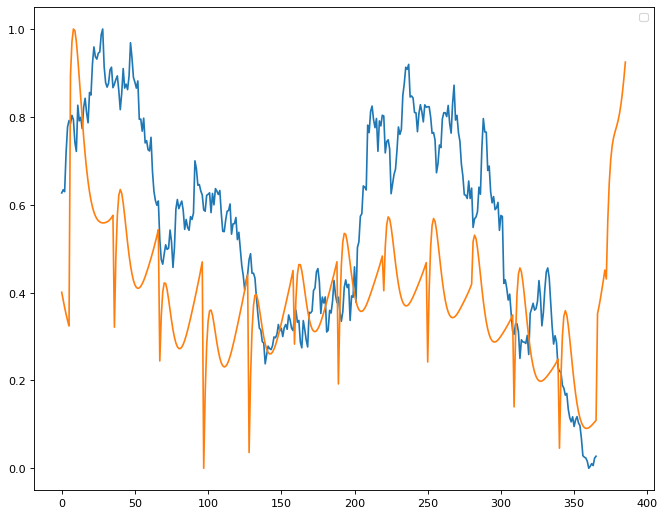

In [ ]:
figure(figsize=(10, 8), dpi=80)

plt.plot(y)
plt.plot(t)
plt.legend()
plt.show()